检测书法文字

步骤:

- 1. 读取图片, 灰度, 二值化处理
- 2. 侵蚀去噪点
- 3. 膨胀连接
- 4. 闭合孔洞
- 5. 边缘检测
- 6. 画边检测


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

In [2]:
# img = cv2.imread("./resources/test_imgs/shufa.jpg")
img = cv2.imread("./resources/test_imgs/maxiaonan.jpg")

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

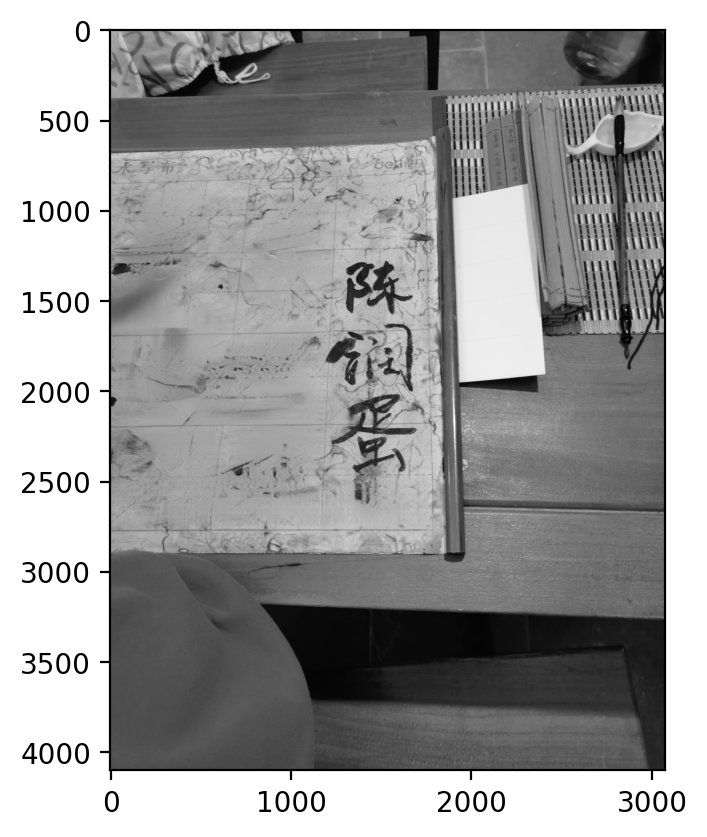

In [4]:
plt.imshow(gray, cmap="gray")

二值化

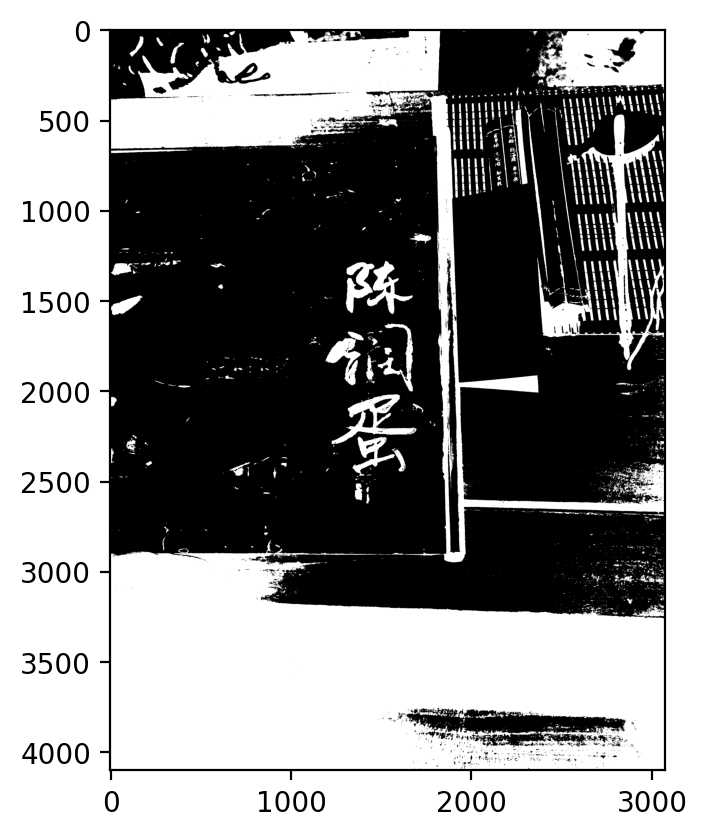

In [5]:
# 将画面像素与比较阈值比较, 小于则设为0(黑色), 大于它设为目标值
r, black_img = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)  # 超出阈值设置为255
plt.imshow(black_img, cmap="gray")

边缘检测

In [6]:
edges = cv2.Canny(black_img, 30, 200)

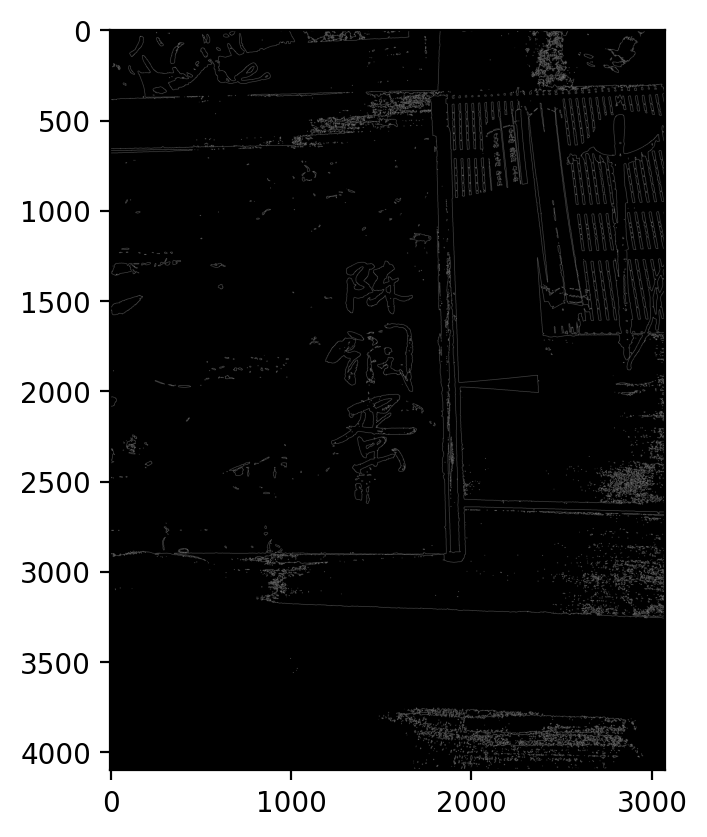

In [7]:
plt.imshow(edges, cmap="gray")

寻找轮廓

In [8]:
coutours, h = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [9]:
img_copy = img.copy()
for item in coutours:
    x, y, w, h = cv2.boundingRect(item)
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)

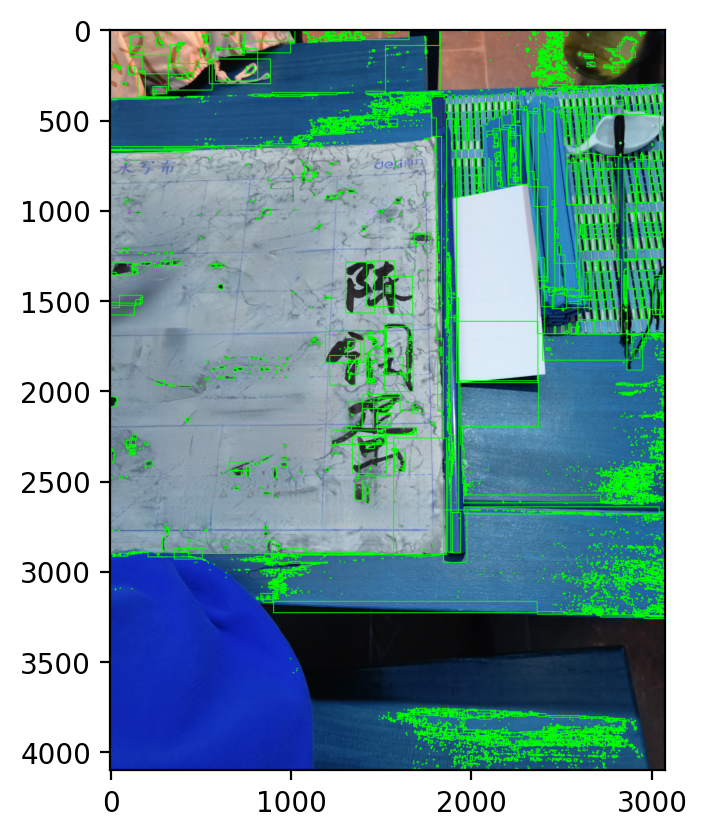

In [10]:
plt.imshow(img_copy)

形态学变换

In [11]:
# 先侵蚀, 去除噪点
kernel = np.ones((3, 3), dtype=np.int8)
erosion = cv2.erode(black_img, kernel=kernel, iterations=1)

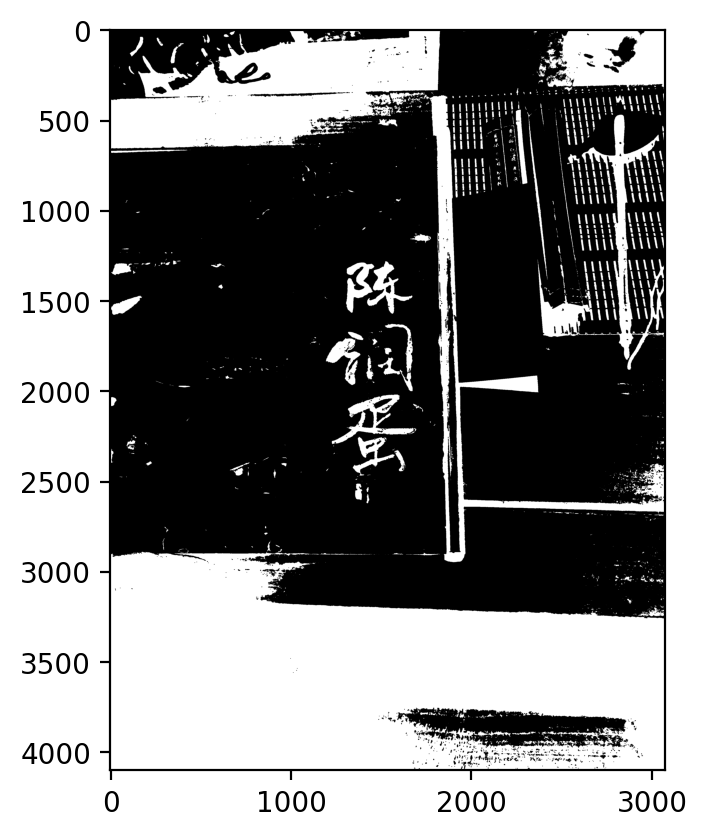

In [12]:
plt.imshow(erosion, cmap="gray")

In [13]:
# 膨胀
kernel = np.ones((10, 10), dtype=np.int8)
dilation = cv2.dilate(erosion, kernel=kernel, iterations=2)

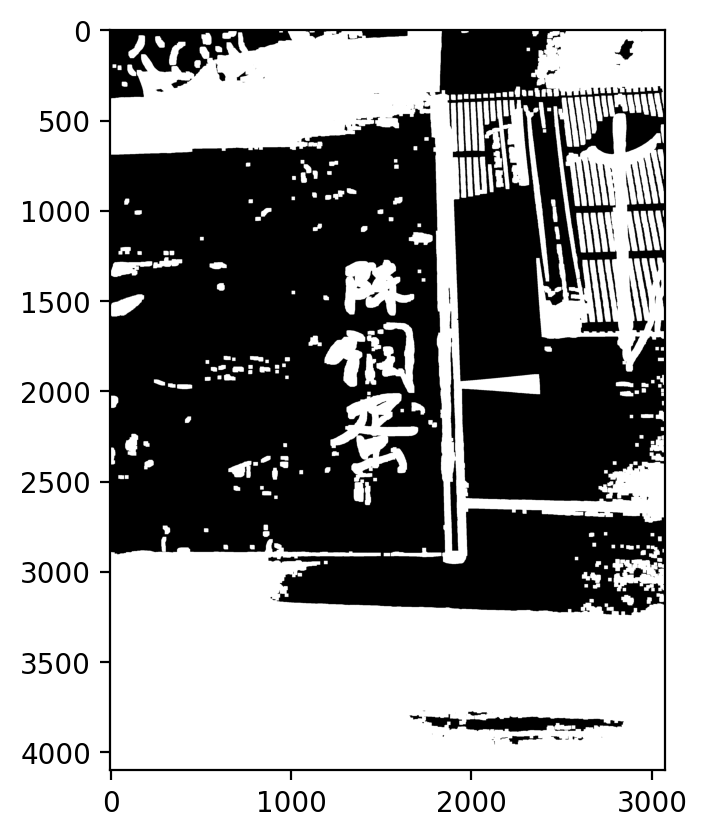

In [14]:
plt.imshow(dilation, cmap="gray")

In [15]:
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, np.ones((10, 10), dtype=np.int8))

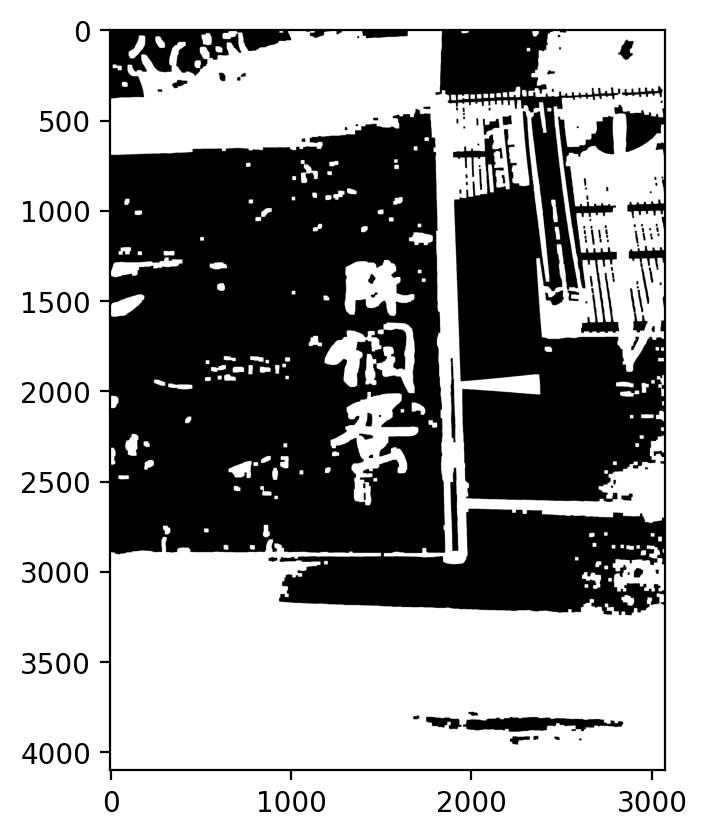

In [16]:
plt.imshow(closing, cmap="gray")

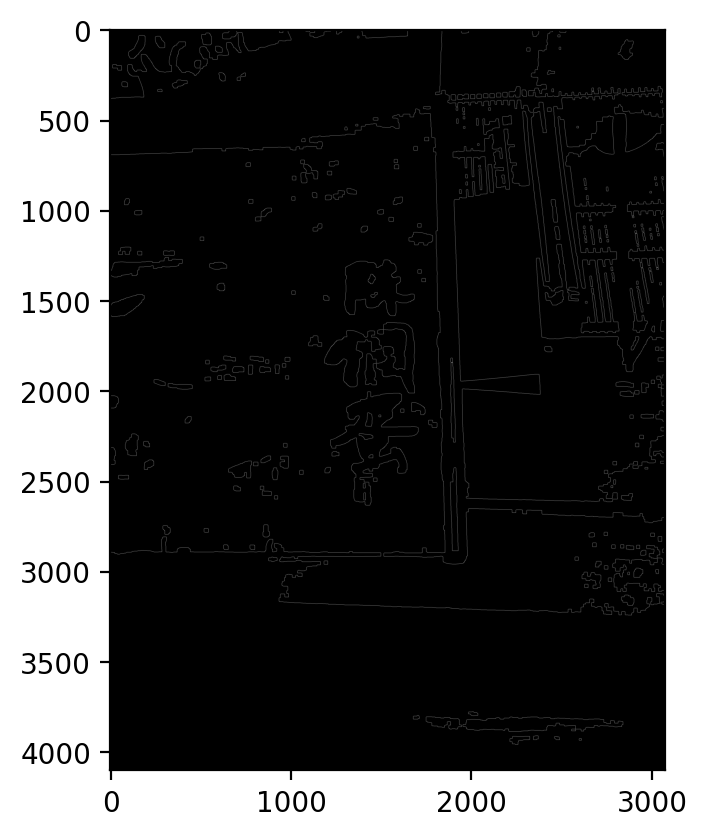

In [17]:
edge = cv2.Canny(closing, 100, 200)
plt.imshow(edge, cmap="gray")

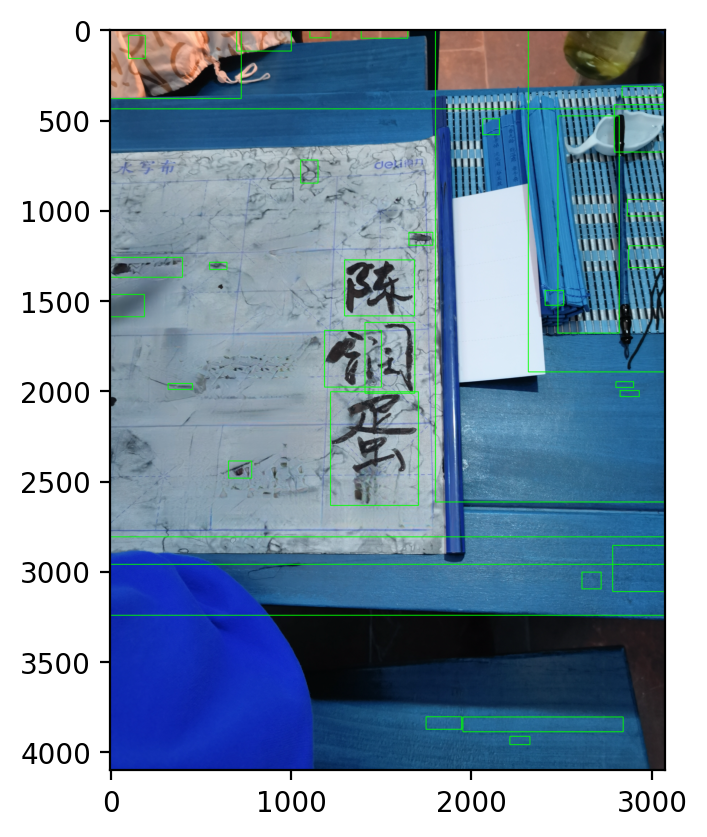

In [18]:
img_copy = img.copy()
for item in cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]:
    x, y, w, h = cv2.boundingRect(item)
    if w > 90:
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(img_copy)